# Indmat prosjekt
###### Liva Berge Flo, André Pettersen-Dahl, Herman Neple

#### Oppgave 1

#### Oppgave 3

3.1

Vi begynner med å importere alle bibliotek vi trenger

In [2]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from data_generators import get_train_test_sorting
import matplotlib.pyplot as plt

For å teste om lagene vi har implementert fungerer, kan vi manuelt kjøre gjennom algoritmen. Vi starter med å initalisere lagene til det nevrale nettverk.

In [3]:
x = np.array([[0,1,2,3]])
X = onehot(x, m)

z0 = embed.forward(X)
z11 = att1.forward(z0)
z12 = ff1.forward(z11)
z2 = un_embed.forward(z12)
Z = softmax.forward(z2)


NameError: name 'm' is not defined

Vi kan da endelig sjekke loss-funksjonens verdi

In [ ]:
L = loss.forward(Z, onehot(np.array([[0]]), m))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/hermanneple/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/yf/2n4jp8f93hj5rp6k94wjwj8h0000gn/T/ipykernel_14454/853391953.py", line 1, in <module>
    L = loss.forward(Z, onehot(np.array([[0]]), m))
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hermanneple/Documents/Fag/Vitber/TMA4320-Prosjekt-2/layers.py", line 197, in forward
  File "/Users/hermanneple/Documents/Fag/Vitber/TMA4320-Prosjekt-2/utils.py", line 20, in onehot
    b,n = x.shape
    ^^^
ValueError: too many values to unpack (expected 2)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/hermanneple/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
    

In [4]:
#definerer variabler
r = 5
m = 2

d = 10
k = 5
p = 15
L = 2

embed = EmbedPosition(9,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']




In [5]:
def test_Adam(x_data, y_data, n_iters, step_size):
    n_batches = x_data.shape[0]
    mean_losses = np.zeros(n_iters)
    for j in range(n_iters):
        losses = []
        for i in range(n_batches):
            x = x_data[i]
            y = y_data[i]

            X = onehot(x,m)
            Z = nn.forward(X)

            losses.append(loss.forward(Z,y))
            dLdZ = loss.backward()
            nn.backward(dLdZ)
            nn.step_Adam()
        mean_loss = np.mean(losses)
        print("Iterasjon ", str(j+1), " L = ",mean_loss, "")
        mean_losses[j] = mean_loss
    return mean_losses

Iterasjon  1  L =  0.6889098306284249 
Iterasjon  2  L =  0.6267176068064566 
Iterasjon  3  L =  0.5292711693098686 
Iterasjon  4  L =  0.4852999575083123 
Iterasjon  5  L =  0.46280345516061017 
Iterasjon  6  L =  0.4525702953357973 
Iterasjon  7  L =  0.5007985409733927 
Iterasjon  8  L =  0.5157368990864548 
Iterasjon  9  L =  0.461207553909298 
Iterasjon  10  L =  0.46275994962750683 
Iterasjon  11  L =  0.4494333284044675 
Iterasjon  12  L =  0.437452955559953 
Iterasjon  13  L =  0.431722681360008 
Iterasjon  14  L =  0.46219624214517496 
Iterasjon  15  L =  0.44574835501119275 
Iterasjon  16  L =  0.4407564969224572 
Iterasjon  17  L =  0.42899490863372813 
Iterasjon  18  L =  0.4214307925668896 
Iterasjon  19  L =  0.42735035984291364 
Iterasjon  20  L =  0.4485283563999219 
Iterasjon  21  L =  0.44475069756845753 
Iterasjon  22  L =  0.4274753951859642 
Iterasjon  23  L =  0.4133737445616121 
Iterasjon  24  L =  0.4138781058639204 
Iterasjon  25  L =  0.42404427880258416 
Iter

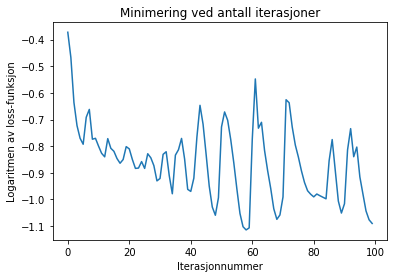

<Figure size 1080x864 with 0 Axes>

In [6]:
plt.plot(np.arange(0,100), np.log(test_Adam(data['x_train'], data['y_train'], 100, 0.1)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

#### Tester for en itterasjon for å se om den greier å predikere neste verdi

In [7]:
print(np.argmax(nn.forward(onehot(np.array([[1, 0 ,0, 1, 1]]), m)),axis=1))

[[0 1 1 0 0]]


Når vi sender inn arrayet [1, 0, 0, 1, 1], vil vi ved å sende det gjennom algoritmen få predikert den første predikerte verdien som det siste elementet i det returnerte arrayet, som beskrevet i avsnitt 1.2. Siden algoritmen sorterer verdiene i arrayet bestående av 0 og 1, forventer vi at det første sifferet i det sorterte arrayet blir 0. Deretter, for å predikere resten av sekvensen, mater vi inn det siste elementet i det predikerte arrayet tilbake inn i arrayet vi sender gjennom 'forward'-steget, og fortsetter prediksjonen derfra.

In [8]:
#Prediksjonsfunksjon
def predict(nn: NeuralNetwork, xs: dict, r:int, m:int):
    
    batches = xs.shape[0]
    y = np.zeros((xs.shape[0],xs.shape[1],r))
    for i in range(batches):
        x = xs[i]
        for j in range(r):
            #print(j)
            X = onehot(x,m)
            z = nn.forward(X)
            Z = np.argmax(z, axis=1)
            #print(Z.shape)
            #print(x.shape)
            toAppend =Z[:,-1:]
            x = np.append(x, toAppend, axis=1)
        y[i,:,:] = x[:,:-r]
    return y


y_pred = predict(nn, x_test, r, m)

def count_correct_predictions(y_pred, y_test):
    correct_predictions = np.count_nonzero(np.count_nonzero(y_pred == y_test, axis=2) == y_pred.shape[-1])
    return correct_predictions

y_test = data['y_test']
correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])
print("Prosentvis riktige predikasjoner:", (correct_predictions/y_pred.shape[1])*100, "%")


Antall rette prediksjoner: 195
Totalt antall prediksjoner: 250
Prosentvis riktige predikasjoner: 78.0 %


Når to forskjellige verdier kan forekomme på fem ulike steder, resulterer dette i totalt $32$ mulige kombinasjoner ($2^5 = 32$). Denne mangfoldigheten gjør det praktisk talt umulig å teste algoritmen vår med nye sekvenser. Ideelt sett ville tapet tendert mot null, og prediksjonene ville vært korrekte hver gang, siden algoritmen burde gjenkjenne det riktige svaret ($y$) i stedet for å forutsi neste sekvens. Dette antyder at vektene våre kanskje ikke er optimalt tilpasset.

In [9]:
#definerer variabler
r = 7
m = 5
n_max = 2*r-1

d = 20
k = 10
p = 25
L = 2

embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
ff1 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed, att1, ff1, un_embed, softmax])

data = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=4)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']


Iterasjon  1  L =  1.5775871423621843 
Iterasjon  2  L =  1.3897550525735327 
Iterasjon  3  L =  1.2814580159612825 
Iterasjon  4  L =  1.2371168005934918 
Iterasjon  5  L =  1.2124694874807078 
Iterasjon  6  L =  1.200786754216139 
Iterasjon  7  L =  1.2222799049510145 
Iterasjon  8  L =  1.2036522343749598 
Iterasjon  9  L =  1.2170375776498719 
Iterasjon  10  L =  1.233755267396465 
Iterasjon  11  L =  1.1910286872211613 
Iterasjon  12  L =  1.179039771844126 
Iterasjon  13  L =  1.1662774789622234 
Iterasjon  14  L =  1.1544466318570978 
Iterasjon  15  L =  1.1482479862822998 
Iterasjon  16  L =  1.1449926201716918 
Iterasjon  17  L =  1.1563084542702928 
Iterasjon  18  L =  1.16002578798453 
Iterasjon  19  L =  1.1700439534672602 
Iterasjon  20  L =  1.167654902694283 
Iterasjon  21  L =  1.1533317139981858 
Iterasjon  22  L =  1.1411943316502982 
Iterasjon  23  L =  1.1206655873247375 
Iterasjon  24  L =  1.112640168587762 
Iterasjon  25  L =  1.1604560378856628 
Iterasjon  26  L

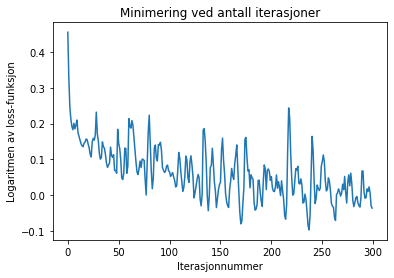

<Figure size 1080x864 with 0 Axes>

In [10]:
plt.plot(np.arange(0,300), np.log(test_Adam(data['x_train'], data['y_train'], 300, 0.1)))
plt.xlabel("Iterasjonnummer")
plt.ylabel("Logaritmen av loss-funksjon")
plt.title("Minimering ved antall iterasjoner")
plt.figure(figsize=(15,12))
plt.show()

In [11]:
y_pred = predict(nn, x_test, r, m)
y_test = data['y_test']

correct_predictions = count_correct_predictions(y_pred, y_test)
print("Antall rette prediksjoner:", correct_predictions)
print("Totalt antall prediksjoner:", y_pred.shape[1])
print("Prosentvis riktige predikasjoner:", (correct_predictions/y_pred.shape[1])*100, "%")


Antall rette prediksjoner: 4
Totalt antall prediksjoner: 250
Prosentvis riktige predikasjoner: 1.6 %
